In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
REPS = 5

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
class Gene:
    def __init__(self, true_five, true_three):
        self.five = true_five
        self.three = true_three
        self.pred_five = []
        self.pred_three = []
        
    def add_pred(self, five, three):
        self.pred_five.append(five)
        self.pred_three.append(three)
        
    def compatible(self, five,  three):
        return five == self.five and three == self.three
    
    def validate(self):
        return len(self.pred_five) == len(self.pred_three) == REPS
    
    def match_five(self, i):
        return self.pred_five[i] == self.five
    
    def match_three(self, i):
        return self.pred_three[i] == self.three
    
    def any_five(self):
        return self.five if self.five in self.pred_five else None
    
    def any_three(self):
        return self.three if self.three in self.pred_three else None
    
    def match(self, i):
        return self.match_five(i) and self.match_three(i)
    
    def any_match(self):
        return any(self.match(i) for i in range(len(self.pred_five)))
    
    def no_splice(self):
        return all(el == -1 for el in self.pred_five)
    
    def directions(self):
        up, down = 0, 0
        for five, three in zip(self.pred_five, self.pred_three):
            up += five < three
            down += five > three
        return up, down
    
    def true_dist(self):
        return (self.three - self.five)*15
    
    def obs_dists(self):
        return [(i-j)*15 for i, j in zip(self.pred_three, self.pred_five)]

In [3]:
genes = {}
with open('better_results.tsv') as record:
    for line in record:
        i, true_five, true_three, pred_five, pred_three = map(int, line.strip().split())
        if i not in genes: genes[i] = Gene(true_five, true_three)
        genes[i].add_pred(pred_five, pred_three)
        assert genes[i].compatible(true_five, true_three)

for gene in genes.values():
    assert gene.validate()

len(genes)

273

In [4]:
perfect = filter(lambda x: x.any_match(), genes.values())
match_five = filter(lambda x: x is not None, map(lambda x: x.any_five(), genes.values()))
match_three = filter(lambda x: x is not None, map(lambda x: x.any_three(), genes.values()))
len(perfect), len(match_five), len(match_three)

(56, 216, 85)

In [5]:
no_splice = filter(lambda x: x.no_splice(), genes.values())
len(no_splice)

4

In [6]:
direction = [0, 0]
for gene in genes.values():
    direction = [i+j for i, j in zip(direction, gene.directions())]
print "{} splices have upstream 5'ss, while, {} do not.".format(*direction)

857 splices have upstream 5'ss, while, 322 do not.


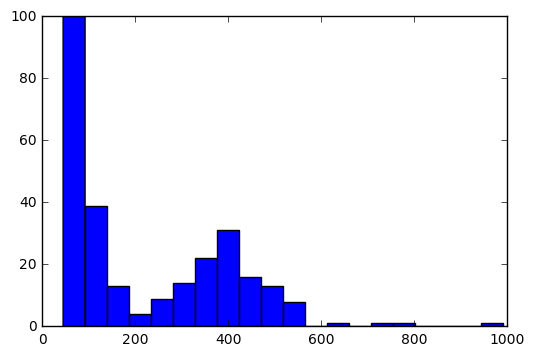

In [7]:
# The longer peak is ribosomal proteins
true_dists = map(lambda x: x.true_dist(), genes.values())
plt.hist(true_dists, bins = 20)
plt.show()

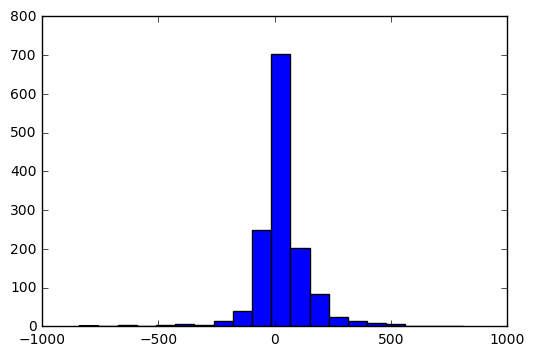

In [8]:
observed_dists = [el for group in map(lambda x: x.obs_dists(), genes.values()) for el in group]
plt.hist(observed_dists, bins = 20)
plt.show()

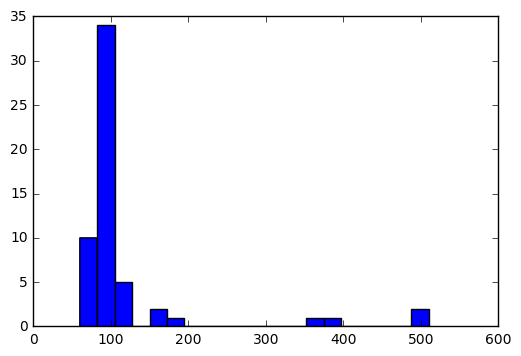

In [12]:
perfect_dists = map(lambda x: x.true_dist(), perfect)
#plt.hist(true_dists, bins = 20)
plt.hist(perfect_dists, bins = 20)
plt.show()

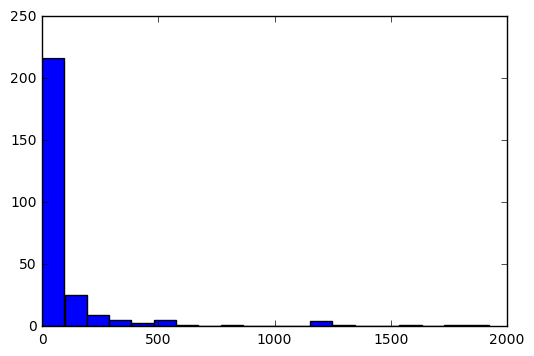

In [14]:
plt.hist(map(lambda x: x.five * 15, genes.values()), bins = 20)
#plt.hist(match_five, bins = 20)
plt.show()

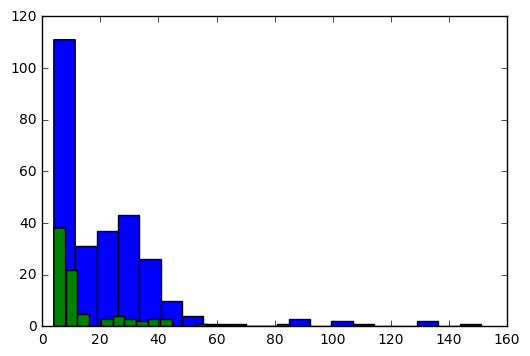

In [11]:
plt.hist(map(lambda x: x.three, genes.values()), bins = 20)
plt.hist(match_three, bins = 20)
plt.show()